<a href="https://colab.research.google.com/github/wasxy47/NLP_Tasks_Beginner/blob/main/Task_01_Sentiment__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description:**

*   Dataset IMDb Reviews (*Kaggle*)
*   Analyze product reviews to determine whether the sentiment is positive or negative
*   Clean and preprocess text (*e.g., lowercasing, removing stopwords*)
*   Convert text to numerical format using TF-IDF or CountVectorizer
*   Train a binary classifier (*e.g., logistic regression*) and evaluate its performance

# **Tools & Libraries:**

Python, Pandas, NLTK/spacy, Scikit-learn

### Test with a New Review

# **Downloading and set DATA**

### Downloading the Dataset from Kaggle

To download the dataset directly from Kaggle, you'll need a Kaggle API key. Here's how to get one:

1.  Go to the Kaggle website ([https://www.kaggle.com/](https://www.kaggle.com/)) and log in to your account.
2.  Click on your profile picture in the top right corner and select "Your Profile".
3.  Navigate to the "Account" tab.
4.  Scroll down to the "API" section and click on "Create New API Token". This will download a file named `kaggle.json` to your computer.

Once you have the `kaggle.json` file, you can upload it to your Colab environment to authenticate and download datasets programmatically. You can use the following code cells to upload the file and set up the Kaggle API.

**Important Security Note:** The `kaggle.json` file contains your API key and should be kept confidential. Avoid sharing it publicly. When sharing your notebook on platforms like GitHub, it's recommended to remove the cells that handle the API key file directly and instead instruct users on how to set up their own Kaggle API key. A more secure method in Colab is to use the Secrets Manager to store your API key.

In [67]:
# from google.colab import files
# files.upload()  # Choose the downloaded kaggle.json file

In [25]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [26]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IMDB Dataset.csv        


# **libraries**

In [28]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('IMDB Dataset.csv')

In [53]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [54]:
df.shape

(50000, 2)

In [55]:
df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [56]:
def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r"<.*?>", " ", text)
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    # Remove non-alphanumeric characters (keeping spaces)
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    # Replace multiple spaces with a single space and remove leading/trailing spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["review"] = df["review"].apply(preprocess)

In [57]:
df['review'][2]

'i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light hearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most i d laughed at one of woody s comedies in years dare i say a decade while i ve never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young woman this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends'

In [58]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
stop_words = stopwords.words('english')

In [60]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['review'] = df['review'].apply(remove_stopwords)
display(df.head())

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


In [61]:
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    df["review"], df["sentiment"], test_size=0.2, random_state=42)

In [63]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
lr_model = make_pipeline(tfidf, LogisticRegression(max_iter=2000, solver='liblinear'))
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=["negative","positive"]))

Logistic Regression Accuracy: 0.8973
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [64]:
count = CountVectorizer(ngram_range=(1,1), max_features=10000)
nb_model = make_pipeline(count, MultinomialNB())
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=["negative","positive"]))

Naive Bayes Accuracy: 0.8538
              precision    recall  f1-score   support

    negative       0.85      0.86      0.85      4961
    positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



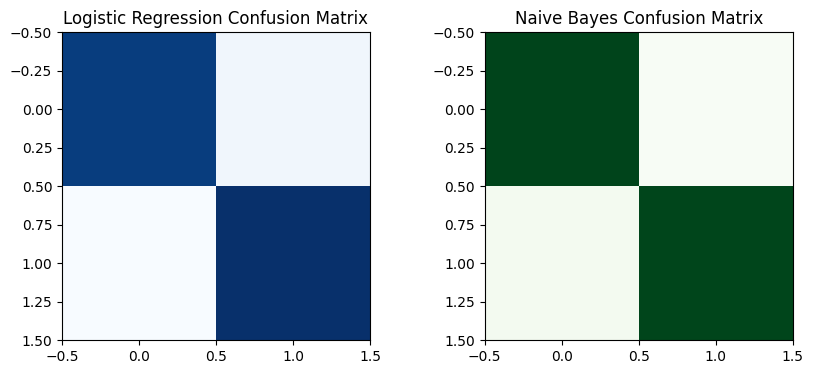

In [65]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].imshow(confusion_matrix(y_test, y_pred_lr), cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[1].imshow(confusion_matrix(y_test, y_pred_nb), cmap="Greens")
axes[1].set_title("Naive Bayes Confusion Matrix")
plt.show()

In [66]:
# Function to predict sentiment for a new review
def predict_sentiment(review_text, model, preprocess_func, stop_words_list):
    # Preprocess the review text
    processed_review = preprocess_func(review_text)
    processed_review = ' '.join([word for word in processed_review.split() if word not in stop_words_list])

    # Predict the sentiment
    prediction = model.predict([processed_review])

    # Return the sentiment as 'positive' or 'negative'
    return "positive" if prediction[0] == 1 else "negative"

# Example usage:
new_review = "This movie was fantastic! I loved every minute of it."

# Make predictions using both models
sentiment_lr = predict_sentiment(new_review, lr_model, preprocess, stop_words)
sentiment_nb = predict_sentiment(new_review, nb_model, preprocess, stop_words)

print(f"Review: {new_review}")
print(f"Logistic Regression Prediction: {sentiment_lr}")
print(f"Naive Bayes Prediction: {sentiment_nb}")

Review: This movie was fantastic! I loved every minute of it.
Logistic Regression Prediction: positive
Naive Bayes Prediction: positive
